# K-nearest neighbors Project

**Challenge:** To be able to predict which movies might or might not be a commercial success. The exercise has precise instructions to build the model. 


-----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Step 1: Loading the dataset**

INSTRUCTIONS:

We must load the two files and store them in two separate data structures (Pandas DataFrames).

On one side, we will have stored the information about the movies and their credits.

In [88]:
import pandas as pd

tmdb_movies = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_movies.csv")
tmdb_credits = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_credits.csv")

In [89]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [90]:
tmdb_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


**Step 2: Creation of a database**

INSTRUCTIONS:

Create a new dataset by joining the two original datasets with all the information.

Now, clean the generated table and leave only the following columns: 'movie_id'   'title'   'overview'   'genres'   'keywords'   'cast'   'crew' .

Teacher suggested to use 'merge' Pandas function:

In [91]:
# Merge using 'id' from tmdb_movies and 'movie_id' from tmdb_credits:
merged_movies = pd.merge(tmdb_movies, tmdb_credits, left_on="id", right_on="movie_id", how="inner")

# checking the new structure:
merged_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [92]:
merged_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Will drop the column 'title_y' and 'title_x' generated during the merge process, and will keep 'original_title':

In [93]:
merged_movies = merged_movies.drop(columns=['title_x', 'title_y'])

merged_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


Cleaning the dataset:

In [94]:
#Step 1: Check for Zeros
# Count zeros in each column
zero_counts = (merged_movies == 0).sum()

# Display columns with zero values
print("Columns with zero values:")
print(zero_counts[zero_counts > 0])

Columns with zero values:
budget          1037
popularity         1
revenue         1427
runtime           35
vote_average      63
vote_count        62
dtype: int64


In [95]:
#Step 2: Check for Missing Data

# Count missing values in each column
missing_counts = merged_movies.isnull().sum()

# Calculate percentage of missing data
missing_percentage = (missing_counts / len(merged_movies)) * 100

# Display columns with missing values
print("Columns with missing values:")
print(missing_counts[missing_counts > 0])
print("\nPercentage of missing values:")
print(missing_percentage[missing_counts > 0])

Columns with missing values:
homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
dtype: int64

Percentage of missing values:
homepage        64.355611
overview         0.062461
release_date     0.020820
runtime          0.041641
tagline         17.572351
dtype: float64


In [96]:
#Step 3: Check for Duplicates

# Count duplicate rows
duplicate_count = merged_movies.duplicated().sum()

# Display the result
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


There is no important information missing in the dataset.
- No duplicates.
- Missing data: No relevant information is missing. Only in 'homepage' , and 'tagline' mainly, which is normal.
- Zeros: Mainly in 'budget' and 'revenue', which is not the information that we are interested in atm.

All good to proceed.

**Step 3: Transform the data**

1. From each of the JSONs:

        A. 'genres' and 'keyword': select the name attribute and replace the columns.
        B. 'cast': Select the first three names.
        C. 'crew' (team): Convert it to contain the name of the director.
        D. 'overview' (summary): Convert it to a list.

2. Reduce our dataset by combining all of our previous converted columns into a single column called tags

**1.** JSON strings to Python objects:

In [97]:
# COnverting the JSON strings to Python objects:
import json
import pandas as pd

# Function to safely load JSON data
def load_json_safe(json_str, default_value=None):
    try:
        return json.loads(json_str)
    except (TypeError, json.JSONDecodeError):
        return default_value

# A.    Transform JSON fields into meaningful lists
merged_movies["genres"] = merged_movies["genres"].apply(lambda x: [item["name"] for item in load_json_safe(x)] if pd.notna(x) else [])
merged_movies["keywords"] = merged_movies["keywords"].apply(lambda x: [item["name"] for item in load_json_safe(x)] if pd.notna(x) else [])

# B.    For 'cast', take only the first three names
merged_movies["cast"] = merged_movies["cast"].apply(lambda x: [item["name"] for item in load_json_safe(x)][:3] if pd.notna(x) else [])

# C.    For 'crew', get the director's name(s)
merged_movies["crew"] = merged_movies["crew"].apply(lambda x: " ".join([crew_member["name"] for crew_member in load_json_safe(x) if crew_member["job"] == "Director"]) if pd.notna(x) else "")

# D.    For 'overview', make it a list with the description (if not NaN)
merged_movies["overview"] = merged_movies["overview"].apply(lambda x: [str(x)] if pd.notna(x) else [])

# Preview the transformations
merged_movies.head(2)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"[In the 22nd century, a paraplegic Marine is d...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"[Captain Barbossa, long believed to be dead, h...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski


**2.** Concatenation of cokumns into 'tags':

In [98]:
# Ensure text-based data is converted to lists of strings
# Convert text-based lists into lists of strings (ensure the structure is consistent)
merged_movies["overview"] = merged_movies["overview"].apply(lambda x: [str(x[0])] if len(x) > 0 else [])
merged_movies["genres"] = merged_movies["genres"].apply(lambda x: [str(genre) for genre in x])
merged_movies["keywords"] = merged_movies["keywords"].apply(lambda x: [str(keyword) for keyword in x])
merged_movies["cast"] = merged_movies["cast"].apply(lambda x: [str(actor) for actor in x])
merged_movies["crew"] = merged_movies["crew"].apply(lambda x: [str(crew_member) for crew_member in x])

# Create the 'tags' column by combining 'overview', 'genres', 'keywords', 'cast', and 'crew'
merged_movies["tags"] = (
    merged_movies["overview"] + 
    merged_movies["genres"] + 
    merged_movies["keywords"] + 
    merged_movies["cast"] + 
    merged_movies["crew"]
)

# Convert the list of strings to a single space-separated string
merged_movies["tags"] = merged_movies["tags"].apply(lambda x: " ".join(x))

# Drop the original columns to avoid redundancy
merged_movies.drop(columns=["genres", "keywords", "cast", "crew", "overview"], inplace=True)

# Preview the result for the first row
print(merged_movies.iloc[0].tags)

In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy Science Fiction culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d Sam Worthington Zoe Saldana Sigourney Weaver J a m e s   C a m e r o n


In [99]:
merged_movies.to_csv("../data/processed/clean_merged_movies.csv", index=False)

**Step 4: Build a KNN**

INSTRUCTIONS:

A.  The first thing to do is to vectorize the text, following the same steps you learned in the previous lesson.

B.  Choose a distance to compare texts. The only one compatible with what we want to do is the cosine distance.

C.  Finally, we can design our similarity function based on the cosine distance.

To transform the text data (tags column) into numerical data that the model can process, we use **TF-IDF vectorization:**

In [100]:
#   A.  Vectorize the Text

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Vectorizing the 'tags' column
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(merged_movies["tags"])

- This creates a sparse matrix where rows represent movies and columns represent unique words, with values indicating the term's importance in the document.

We use **cosine distance** as the similarity measure. It calculates the angle between two vectors, ensuring similarity is based on direction and not magnitude, which is ideal for textual data:

In [101]:
#   B.  Choose Cosine Distance for Similarity

model = NearestNeighbors(n_neighbors=6, algorithm="brute", metric="cosine")
model.fit(tfidf_matrix)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

- The model is ready to find the 5 closest movies to a given movie based on their text similarity (5 neighbors + 1 for the movie itself).

We define a function to find similar movies. It identifies the index of the input movie, computes distances, and returns the top 5 similar movies:

In [102]:
#   C.  Define recommendation function

def get_movie_recommendations(movie_title):
    """
    Returns a list of similar movies to the given movie title based on cosine similarity.
    """
    # Verify column existence
    if "original_title" not in merged_movies.columns:
        return "Error: 'original_title' column is missing from the dataset."
    
    try:
        # Find index of the movie
        movie_index = merged_movies[merged_movies["original_title"] == movie_title].index[0]
        
        # Compute distances and indices
        distances, indices = model.kneighbors(tfidf_matrix[movie_index])
        
        # Format output as a list of tuples (movie title, distance)
        similar_movies = [
            (merged_movies["original_title"].iloc[i], distances[0][j]) for j, i in enumerate(indices[0])
        ]
        return similar_movies[1:]  # Exclude the input movie
    except IndexError:
        return f"Error: Movie '{movie_title}' not found in the dataset."

- This function uses the fitted model to find recommendations and excludes the input movie from the output.

**TESTING THE MODEL:** Introduce any movie title below from the list and see the recommendations.

In [112]:
# Test the recommendation system

input_movie = "Spectre"  #<--------------------------------------Replace with any movie in the dataset



recommendations = get_movie_recommendations(input_movie)

# Display results
print(f"Recommendations for '{input_movie}':")
if isinstance(recommendations, str):
    print(recommendations)
else:
    for movie, distance in recommendations:
        print(f"- Film: {movie} | Similarity Score: {1 - distance:.2f}")


Recommendations for 'Spectre':
- Film: Never Say Never Again | Similarity Score: 0.26
- Film: Skyfall | Similarity Score: 0.26
- Film: From Russia with Love | Similarity Score: 0.24
- Film: Quantum of Solace | Similarity Score: 0.24
- Film: Dr. No | Similarity Score: 0.23


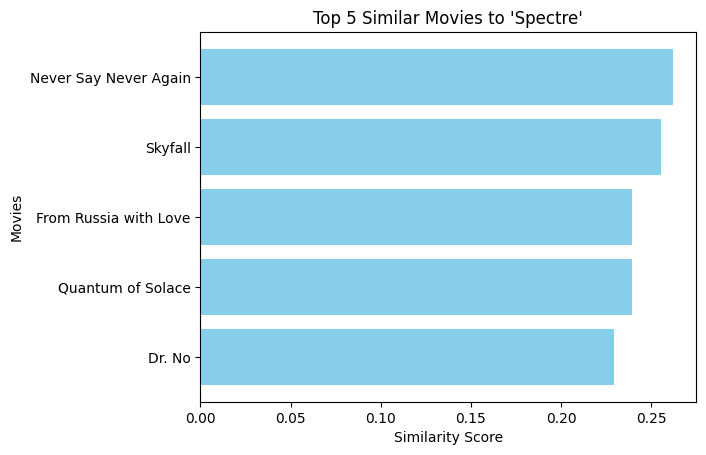

In [104]:
import matplotlib.pyplot as plt

# Visualize recommendations
movies, similarities = zip(*[(rec[0], 1 - rec[1]) for rec in recommendations])
plt.barh(movies, similarities, color="skyblue")
plt.xlabel("Similarity Score")
plt.ylabel("Movies")
plt.title("Top 5 Similar Movies to '{}'".format(input_movie))
plt.gca().invert_yaxis()
plt.show()

Lets save the model:

In [116]:
from pickle import dump

# Save the trained KNN model
dump(model, open("../models/knn_neighbors-6_algorithm-brute_metric-cosine.sav", "wb"))

# Save the TfidfVectorizer
dump(vectorizer, open("../models/movie_vectorizer.sav", "wb"))

# Save the cleaned dataset
merged_movies.to_csv("../data/processed/merged_movies.csv", index=False)